In [1]:
import os
import requests
import zipfile

import numpy as np

import matplotlib.pyplot as plt

# 1. Convolution
#### 1.1 What is a convolution?

Say I give you the coefficients of polynomials $P$ and $Q$. If I give you $x$, there are two ways to evaluate $P(x)*Q(x)$ :

1. Evaluate $P(x)$ and $Q(x)$, and multiply them together; or
2. Expand $PQ$ into a bigger polynomial, then evaluate it at $x$.

In the first case, what you do to $P(x)$ and $Q(x)$ is called **multiplication**. In the second case, what you do to the coefficients of $P$ and $Q$ to get the coefficients of $PQ$ is called (discrete) **convolution**.

As we have seen, multiplication and convolution can often be used to get the same results through different methods.


* $ P(x) = 7 - 2x + 4x^2 $
* $ Q(x) = 3 + x - 2x^2 $
* $ x = 1 $

**Approach 1**: 
$$(7 - 2 + 4).(3 + 1 - 2) = $$
$$= 9 . 2 $$
$$ = 18$$
**Approach 2**: 
$$(7 - 2x + 4x^2).(3 + x - 2x^2) = $$
$$ = (21) + (7x-6x) + (-14x^2 + 12x^2 - 2x^2) + (4x^3 + 4x^3) + (-8x^4) $$
$$ = (21) + (x) + (-4x^2) + (8x^3) + (-8x^4) $$
$$ = 18$$

#### 1.2 Weighted average of a function
In calculating a simple average all numbers are treated equally and assigned equal weight. But a weighted average assigns weights that determine in advance the relative importance of each data point. In calculating a **weighted average**, each number in the data set is multiplied by a predetermined weight before the final calculation is made.

| Data point | Value | Weight | Weighted value |
| --- | --- | --- | --- |
| 1 | 10 | 2 | 20 |
| 2 | 50 | 5 | 250 |
| 3 | 40 | 3 | 120 |
| **TOTAL** | 100 | 10 | 390 |
| **Weighted Avg** |  |  | 39 |

#### 1.3 Convolution - second explanation
Given two weighted dice with following probability distribution:

<center><img src="img/convolution_0.png" alt="Two weighted dices" width="800" height="424" /></center>
<p style="text-align: center; font-size: small;"><i><b>Figure 1.</b> Two unfair (weighted) dice </i></p>

<br/>

Convolution would be applying one of the function over the other and getting as a result a new function with new probability distribution.
<center><img src="img/convolution_1.png" alt="Convolution of probability functions" width="800" height="191" /></center>
<p style="text-align: center; font-size: small;"><i><b>Figure 2.</b> Convolution of probability functions </i></p>

<br/>

In order to get the polynomial of the new function, the easiest would be to **FLIP** the second distribution (kernel).
<center><img src="img/convolution_2.png" alt="Flip the kernel" width="400" height="508" /></center>
<p style="text-align: center; font-size: small;"><i><b>Figure 3.</b> Flip the second distribution (kernel) </i></p>

<br/>

And now we can easily calculate each probability of the new function by executing a **dot product** between the respective terms and then slide the kernel to the right.
<center><img src="img/convolution_3.png" alt="Multiply and slide" width="800" height="423" /></center>
<p style="text-align: center; font-size: small;"><i><b>Figure 4.</b> Multiply and slide right </i></p>

<br/>

So, we end up with next formula.
<center><img src="img/convolution_4.png" alt="Convolution formula" width="800" height="436" /></center>
<p style="text-align: center; font-size: small;"><i><b>Figure 5.</b> Convolution formula</i></p>


#### 1.4 Formula
* The **discrete** formula looks like this:
```
y[n] = Σ x[k] * h[n - k]
```
or more formally:
$$[f*g](s) = \sum f(x) \cdot g(s-x) $$

Considering the general rule of thumb:
$$\sum \text{... } \rightarrow \int \text{... }dx$$

* The **continious** formula would be:

$$[f*g](s) = \int_{-\infty}^{\infty} f(x) \cdot g(s-x) dx$$


<br/>

It’s easiest if you assume one of the functions is a probability density function $P$ centered at the origin. Then the convolution of $P$ with a function $Q$ at each $x$ is the weighted average of $Q$, using $P$ as the weight function centered at $x$. This clearly creates a **smooth approximation** of $Q$ where the random noise in $Q$ is averaged out.


# 2. Convolution operation

Convolution between two matrices is a simple operation. You simply need to multiply the `input` matrix to a smaller `kernel` matrix in a specific way.


But before that, you need to **flip** the kernel (i.e. reflect its content across the center).

* NB: If not flipped, then we are not doing a **convolution**, but a **cross-correlation**.

<center><img src="img/cnn_0.png" alt="Convolution between two matrices" width="600" height="262" /></center>
<center><img src="img/cnn_1.png" alt="Convolution between two matrices" width="600" height="259" /></center>
<p style="text-align: center; font-size: small;"><i><b>Figure 6.</b> Convolution between two matrices</i></p>

<br/>


We start from the upper-left corner of the `input` matrix. And we multiply each cell from the `input` to the corresponding cell into the `kernel` matrix. And we sum the result. This way we calculate the first cell of the `output` matrix.
<center><img src="img/cnn_2.png" alt="Multiply a submatrix from the `input` to the `kernel`" width="600" height="372" /></center>
<p style="text-align: center; font-size: small;"><i><b>Figure 7.</b> Multiply a submatrix from the `input` to the `kernel`</i></p>

<br/>

Then we slide the window to the right and calculate the next `output` cell.
<center><img src="img/cnn_3.png" alt="Slide the calculation window to the right" width="600" height="362" /></center>
<p style="text-align: center; font-size: small;"><i><b>Figure 8.</b> Slide the calculation window to the right</i></p>

<br/>

Once we can't slide more to the right, we go one row down and start over from the leftest cell.
<center><img src="img/cnn_4.png" alt="One row down and start again from the leftest cell" width="600" height="371" /></center>
<p style="text-align: center; font-size: small;"><i><b>Figure 9.</b> One row down and start again from the leftest cell</i></p>

<br/>

* **Size of the output**

The size of the output matrix is calculated as:
$$ O = I - K + 1 $$
where $I$ is the size of the `input` matrix and $K$ is the size of the `kernel` matrix.


In [2]:
def correlate2d(image: np.ndarray, kernel: np.ndarray, mode: str = 'valid') -> np.ndarray:
    """
    Compute the correlation of the image with the kernel.
    The correlation is a measure of how similar two signals are.
    In the context of image processing, the correlation is used to find the features in the image.
    The correlation is calculated by multiplying the kernel with the image cell by cell and summing the result.
    The output is a matrix of the same size as the image.
    The mode parameter determines the shape of the output matrix.
    - 'full' mode: the output matrix is the same size as the image.
    - 'valid' mode: the output matrix is the same size as the image minus the kernel size.

    Args:
        image (np.ndarray): The input image.
        kernel (np.ndarray): The kernel.
        mode (str): The mode of the correlation.

    Returns:
        np.ndarray: The output matrix.
    """

    # Get the shape of the kernel and image
    m, n = kernel.shape
    y, x = image.shape

    # CASE 1: Full mode - output shape is (y + m - 1, x + n - 1)
    if mode == 'valid':
        # SLOW IMPLEMENTATION (not vectorized)
        # for i in range(y - m + 1):
        #     for j in range(x - n + 1):
        #         output[i, j] = (image[i:i+m, j:j+n] * kernel).sum()

        # FAST IMPLEMENTATION (vectorized)
        output = einsum_submatrices(image, kernel, x-n+1, y-m+1, m, n)
    
    # CASE 2: Valid mode - output shape is (y - m + 1, x - n + 1)
    elif mode == 'full':
        # Add padding to the input image
        image = np.pad(image, ((m-1, m-1), (n-1, n-1)), mode='constant', constant_values=0)
        output = einsum_submatrices(image, kernel, x+n-1, y+m-1, m, n)
    else:
        raise ValueError(f"Invalid mode: {mode}")
    return output

def einsum_submatrices(image: np.ndarray, kernel: np.ndarray, width: int, height: int, m: int, n: int) -> np.ndarray:
    """
    Generate submatrices of the image in order to use np.einsum.
    The submatrices are generated by sliding the kernel over the image.
    The submatrices are then multiplied with the kernel and the result is summed.
    The result is a matrix of the same size as the image.

    Args:
        image (np.ndarray): The input image.
        kernel (np.ndarray): The kernel.
        width (int): The width of the output matrix.
        height (int): The height of the output matrix.
        m (int): The number of rows of the kernel.
        n (int): The number of columns of the kernel.

    Returns:

    """
    submatrices = []
    for i in range(height):
        for j in range(width):
            submatrices.append(image[i:i+m, j:j+n])
    submatrices = np.array(submatrices)
    submatrices = submatrices.reshape(height, width, m, n)
    # Multiply the submatrices with the kernel
    # np.einsum is a function that allows you to perform a dot product between two arrays.
    # It is a more efficient way to perform the dot product than using a for loop.
    # It is also more readable and concise.
    # Generate submatrices of the image in order to use np.einsum
    return np.einsum('ijkl,kl->ij', submatrices, kernel)

def convolve2d(image: np.ndarray, kernel: np.ndarray, mode: str = 'valid') -> np.ndarray:
    """
    Convolve the image with the kernel.
    """
    # Flip the kernel
    kernel = np.flip(kernel)
    return correlate2d(image, kernel, mode)

In [3]:
test_input = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

# Kernel (filter)
test_kernel = np.array([
    [1, 0],
    [0, -1]
])

print(correlate2d(test_input, test_kernel, mode='valid'))
print(convolve2d(test_input, test_kernel, mode='valid'))
print('')
print(correlate2d(test_input, test_kernel, mode='full'))
print(convolve2d(test_input, test_kernel, mode='full'))

[[-4 -4]
 [-4 -4]]
[[4 4]
 [4 4]]

[[-1 -2 -3  0]
 [-4 -4 -4  3]
 [-7 -4 -4  6]
 [ 0  7  8  9]]
[[ 1  2  3  0]
 [ 4  4  4 -3]
 [ 7  4  4 -6]
 [ 0 -7 -8 -9]]


# 3. Convolutional Neural Network

#### 3.1 Convolutional layer

* **The input** is a 3-dimensional block of data (e.g. image tensor). In this case the depth is 3.
* **The weights** are organized as kernels (a 3-dimensional block with the same depth as the input). The layer may have one or multiple kernels.
* **The bias matrices** have the same shape as the outputs. The number of biases is equal to the number of kernels in the layer.
* **The output** is a 3-dimensional block of data. The depth of the output is the same as the number of kernels.

<center><img src="img/cnn_5.png" alt="Convolutional layer with 2 kernels" width="800" height="404" /></center>
<p style="text-align: center; font-size: small;"><i><b>Figure 10.</b> Convolutional layer with 2 kernels</i></p>

First, let's create an abstract class, which will further be used for any kind of layers in our network.

In [4]:
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    def forward(self, input: np.ndarray) -> np.ndarray:
        # TODO: return output
        pass

    def backward(self, output_gradient: np.ndarray, learning_rate: float) -> np.ndarray:
        # TODO: update parameters and return input gradient
        pass

Now, let's create the **convolutional layer**.

In [5]:
class Convolutional(Layer):

    def __init__(self, input_shape: tuple, kernel_size: int, num_of_kernels: int):
        """
        Initialize the convolutional layer.
        The layer will be initialized with random weights and biases.

        The shape of the output is calculated as:
         * output_shape = (num_of_kernels, input_height - kernel_size + 1, input_width - kernel_size + 1)
         * kernel_shape = (num_of_kernels, input_depth, kernel_size, kernel_size)
         * biases_shape = (output_shape)

        Args:
            input_shape: tuple, shape of the input data (depth, height, width)
            kernel_size: int, size of the kernel (e.g. 4 for 4x4 kernel)
            num_of_kernels: int, number of kernels in the layer (e.g. 2 for 2 kernels)
        """
        input_depth, input_height, input_width = input_shape                            # (e.g. 3, 28, 28)
        self.num_of_kernels = num_of_kernels                                            # (e.g. 2)
        self.input_shape = input_shape                                                  # (e.g. 3, 28, 28)
        self.kernel_shape = (num_of_kernels, input_depth, kernel_size, kernel_size)     # (e.g. 2, 3, 4, 4)
        self.output_shape = (num_of_kernels, input_height - kernel_size + 1, input_width - kernel_size + 1) # (e.g. 2, 25, 25)

        # Generate random weights and biases
        self.kernels = np.random.randn(*self.kernel_shape)  # (e.g. 2, 3, 4, 4)
        self.biases = np.random.randn(*self.output_shape)   # (e.g. 2, 25, 25)

#### 3.2 Forward propagation
**How the output is produced?**

Take each matrix in the first kernel and compute the cross-correlation with the input data. Sum the three results and add up the first bias. This will produce the first output.


<center><img src="img/cnn_6.png" alt="Convolutional layer - how the output is produced" width="800" height="467" /></center>
<p style="text-align: center; font-size: small;"><i><b>Figure 11.</b> Convolutional layer - how the output is produced</i></p>

After that go on in the same manner for the next cells in this output matrix.


Likewise, the second output is calculated by cross-correlating the input with the second kernel and second bias.


<center><img src="img/cnn_7.png" alt="Convolutional layer - the second output is produced in the same way, but using the second kernel" width="800" height="468" /></center>
<p style="text-align: center; font-size: small;"><i><b>Figure 12.</b> Convolutional layer - the second output is produced in the same way, but using the second kernel</i></p>

We can simplify the formula to:
$$Y_1 = B_1 + X_1 \star K_{11} + X_2 \star K_{12} + X_3 \star K_{13} $$
$$Y_2 = B_2 + X_2 \star K_{21} + X_2 \star K_{22} + X_3 \star K_{23} $$
$$ \vdots $$
$$Y_d = B_d + X_1 \star K_{d1} + X_2 \star K_{d2} + X_3 \star K_{d3} $$

Where $d$ is the the number of kernels (hence the depth of the outputs).



<center><img src="img/cnn_8.png" alt="Convolutional layer - the output formula (simplified)" width="400" height="227" /></center>
<p style="text-align: center; font-size: small;"><i><b>Figure 13.</b> Convolutional layer - the output formula (simplified)</i></p>

And if we generalize the shape of the input, we come up with following formula:

$$Y_d = B_d + X_1 \star K_{d1} + X_2 \star K_{d2} + \dots + X_n \star K_{dn} $$

or

$$ Y_i = B_i + \sum_{j=1}^{n}{X_j \star K_{ij}} \text{  ,  } i = 1 \dots d$$

Where $n$ is the depth of the input and $d$ is the number of kernels.


If we go further, we will see a similarity between a regular dense layer and a convolutional layer. The only difference is that in the dense layer we calculate **dot product** between **matrices of scalar values**, while here we calculate **cross-correlated dot product** between **matrices of matrices**. But in general the dense layer is a subtype of the convolutional layer.

<center><img src="img/cnn_9.png" alt="Convolutional layer looks the same as a dense layer" width="800" height="288" /></center>
<p style="text-align: center; font-size: small;"><i><b>Figure 14.</b> Convolutional layer looks very similar to a regular dense layer</i></p>

In [6]:
def forward(self, input: np.ndarray) -> np.ndarray:
    """
    Forward pass through the convolutional layer.
        - The input is a 3D tensor (e.g. image tensor).
        - The output is a 3D tensor (e.g. feature map).

    The formula is:
        - Y_i = B_i + \\sum_{j=1}^{n}{X_j \\star K_{ij}}
    where:
        - Y_i is the output of the i-th kernel
        - B_i is the bias of the i-th kernel
        - X_j is the j-th depth of the input
        - K_{ij} is the j-th depth of the i-th kernel
        - n is the number of depths of the input

    Args:
        input: np.ndarray, input tensor (e.g. image tensor)
    Returns:
        np.ndarray, output tensor (e.g. feature map)
    """
    self.input = input
    self.output = np.copy(self.biases)

    # For each kernel (e.g. 2)
    for i in range(self.number_of_kernels): 
        # For each depth of the input (e.g. 3)
        for j in range(self.input_shape[0]):
            # The formula is:
            # - output[i] += input[j] * kernels[i, j]
            # where:
            # - output[i] is the output of the i-th kernel
            # - input[j] is the j-th depth of the input
            # - kernels[i, j] is the j-th depth of the i-th kernel
            # - mode='valid' is the mode of the correlation operation
            self.output[i] += correlate2d(self.input[j], self.kernels[i, j], mode='valid')

    # Return the output of the layer
    return self.output

#### 3.3 Backward propagation

We need to calculate the following derivatives:
$$\frac{dJ}{dK_{ij}}, \frac{dJ}{dB_i}, \frac{dJ}{dX_j} $$

And after applying several *chain rules* and some math mojo we come up with next formulas:
$$\frac{dJ}{dK_{ij}} = X_j \star \frac{dJ}{dY_{i}}$$
$$\frac{dJ}{dB_i} = \frac{dJ}{dY_{i}}$$
$$\frac{dJ}{dX_j} = \sum_{i=1}^d {\frac{dJ}{dY_{i}} \ast_{full} }K $$

In [7]:
def backward(self, output_gradient: np.ndarray, learning_rate: float) -> np.ndarray:
    """
    Backward pass through the convolutional layer.

    Args:
        output_gradient: np.ndarray, the gradient of the output (e.g. [[1, 2, 3], [4, 5, 6]])
        learning_rate: float, the learning rate

    Returns:
        np.ndarray, the gradient of the input (e.g. [1, 2, 3, 4, 5, 6])
    """
    kernels_gradient = np.zeros(self.kernel_shape)
    input_gradient = np.zeros(self.input_shape)

    for i in range(self.num_of_kernels):
        for j in range(self.input_shape[0]): # input depth
            kernels_gradient[i, j] = correlate2d(self.input[j], output_gradient[i], mode='valid')
            input_gradient[j] += convolve2d(output_gradient[i], self.kernels[i, j], mode='full')

    self.kernels -= learning_rate * kernels_gradient
    self.biases -= learning_rate * output_gradient

    return input_gradient

So, finally, the class will look like this:

In [8]:
class Convolutional(Layer):

    def __init__(self, input_shape: tuple, kernel_size: int, num_of_kernels: int):
        """
        Initialize the convolutional layer.
        The layer will be initialized with random weights and biases.

        The shape of the output is calculated as:
         * output_shape = (num_of_kernels, input_height - kernel_size + 1, input_width - kernel_size + 1)
         * kernel_shape = (num_of_kernels, input_depth, kernel_size, kernel_size)
         * biases_shape = (output_shape)

        Args:
            input_shape: tuple, shape of the input data (depth, height, width)
            kernel_size: int, size of the kernel (e.g. 4 for 4x4 kernel)
            num_of_kernels: int, number of kernels in the layer (e.g. 2 for 2 kernels)
        """
        input_depth, input_height, input_width = input_shape                            # (e.g. 3, 28, 28)
        self.num_of_kernels = num_of_kernels                                            # (e.g. 2)
        self.input_shape = input_shape                                                  # (e.g. 3, 28, 28)
        self.kernel_shape = (num_of_kernels, input_depth, kernel_size, kernel_size)     # (e.g. 2, 3, 4, 4)
        self.output_shape = (num_of_kernels, input_height - kernel_size + 1, input_width - kernel_size + 1) # (e.g. 2, 25, 25)

        # Generate random weights and biases
        self.kernels = np.random.randn(*self.kernel_shape)  # (e.g. 2, 3, 4, 4)
        self.biases = np.random.randn(*self.output_shape)   # (e.g. 2, 25, 25)

    def forward(self, input: np.ndarray) -> np.ndarray:
        """
        Forward pass through the convolutional layer.
            - The input is a 3D tensor (e.g. image tensor).
            - The output is a 3D tensor (e.g. feature map).

        The formula is:
            - Y_i = B_i + \\sum_{j=1}^{n}{X_j \\star K_{ij}}
        where:
            - Y_i is the output of the i-th kernel
            - B_i is the bias of the i-th kernel
            - X_j is the j-th depth of the input
            - K_{ij} is the j-th depth of the i-th kernel
            - n is the number of depths of the input

        Args:
            input: np.ndarray, input tensor (e.g. image tensor)
        Returns:
            np.ndarray, output tensor (e.g. feature map)
        """
        self.input = input
        self.output = np.copy(self.biases) # Output = bias + sum(input * kernel)

        # For each kernel (e.g. 2)
        for i in range(self.num_of_kernels): 
            # For each depth of the input (e.g. 3)
            for j in range(self.input_shape[0]):
                # The formula is:
                # - output[i] += input[j] * kernels[i, j]
                # where:
                # - output[i] is the output of the i-th kernel
                # - input[j] is the j-th depth of the input
                # - kernels[i, j] is the j-th depth of the i-th kernel
                # - mode='valid' is the mode of the correlation operation
                self.output[i] += correlate2d(self.input[j], self.kernels[i, j], mode='valid')

        # Return the output of the layer
        return self.output

    def backward(self, output_gradient: np.ndarray, learning_rate: float) -> np.ndarray:
        """
        Backward pass through the convolutional layer.

        Args:
            output_gradient: np.ndarray, the gradient of the output (e.g. [[1, 2, 3], [4, 5, 6]])
            learning_rate: float, the learning rate

        Returns:
            np.ndarray, the gradient of the input (e.g. [1, 2, 3, 4, 5, 6])
        """
        kernels_gradient = np.zeros(self.kernel_shape)
        input_gradient = np.zeros(self.input_shape)

        for i in range(self.num_of_kernels):
            for j in range(self.input_shape[0]): # input depth
                kernels_gradient[i, j] = correlate2d(self.input[j], output_gradient[i], mode='valid')
                input_gradient[j] += convolve2d(output_gradient[i], self.kernels[i, j], mode='full')

        self.kernels -= learning_rate * kernels_gradient
        self.biases -= learning_rate * output_gradient

        return input_gradient

# 4. Reshape Layer

This layer is needed since the output of a **convolutional layer** is a 3D block. While typically at the end of a network we use **dense layers**, which take in a column vector as an input. Therefore, we need a mechanism that reshapes data, hence the **reshape layer**.

In [9]:
class Reshape(Layer):

    def __init__(self, input_shape: tuple, output_shape: tuple):
        self.input_shape = input_shape
        self.output_shape = output_shape

    def forward(self, input: np.ndarray) -> np.ndarray:
        """
        Reshape the input to the output shape.

        Args:
            input: np.ndarray, the input to be reshaped (e.g. [1, 2, 3, 4, 5, 6])

        Returns:
            np.ndarray, the reshaped input (e.g. [[1, 2, 3], [4, 5, 6]])
        """
        return input.reshape(self.output_shape)

    def backward(self, output_gradient: np.ndarray, learning_rate: float) -> np.ndarray:
        """
        Reshape the output gradient to the input shape.

        Args:
            output_gradient: np.ndarray, the gradient of the output (e.g. [[1, 2, 3], [4, 5, 6]])

        Returns:
            np.ndarray, the gradient of the input (e.g. [1, 2, 3, 4, 5, 6])
        """
        return output_gradient.reshape(self.input_shape)

# 5. Dense layer
We will add a standart **dense** (fully-conected) layer, which you should already know from all other neural networks, covered here.

In [10]:
class Dense(Layer):
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(output_size, input_size)
        self.bias = np.random.randn(output_size, 1)

    def forward(self, input: np.ndarray) -> np.ndarray:
        self.input = input
        # Return the standard output of the layer (weights * input + bias)
        return np.dot(self.weights, self.input) + self.bias

    def backward(self, output_gradient: np.ndarray, learning_rate: float) -> np.ndarray:
        # Calculate the weights gradient
        weights_gradient = np.dot(output_gradient, self.input.T)
        # Calculate the input gradient
        input_gradient = np.dot(self.weights.T, output_gradient)
        # Update the weights and bias
        self.weights -= learning_rate * weights_gradient
        self.bias -= learning_rate * output_gradient
        return input_gradient

# 6. Cross Entropy Loss
We'll prepare our **convolutional neural network** for classification task. Hence, we'll use the **cross entropy loss** formula.

If this is the **actual** output of the network:
$$ \hat{Y} = \begin{bmatrix}\hat{y_1}\\\hat{y_2}\\\vdots\\\hat{y_i}\end{bmatrix}  ,  \hat{y_i} \in \{0,1\} $$

And this is the **expected** one:
$$ Y = \begin{bmatrix}y_1\\y_2\\\vdots\\y_i\end{bmatrix} $$

Then the **cross-entropy loss** formula would be:
$$ J = -\frac{1}{n} \sum_{i=1}^{n} \hat{y_i} log(y_i) + (1-\hat{y_i}) log(1-y_i) $$

Thus, the derivative of $J$ w.r.t to the **output** would be:
$$ \frac{dJ}{dY} = \begin{bmatrix} \frac{dJ}{dy_1} \\ \frac{dJ}{dy_2} \\\vdots\\ \frac{dJ}{dy_i} \end{bmatrix} 
= \frac{1}{n} \left(\frac{1-\hat{y_i}}{1-y_i} - \frac{\hat{y_i}}{y_i} \right) $$

In [11]:
def cross_entropy_loss(Y_true: np.ndarray, Y_pred: np.ndarray) -> float:
    """
    Calculate the cross-entropy loss.

    Args:
        Y_true: np.ndarray, the true labels (e.g. [0, 1, 0, 1, 0])
        Y_pred: np.ndarray, the predicted labels (e.g. [0.1, 0.9, 0.1, 0.9, 0.1])

    Returns:
        float, the cross-entropy loss
    """
    e = 1e-7 # Avoid log(0)
    return -np.mean(Y_true * np.log(Y_pred + e) + (1 - Y_true) * np.log(1 - Y_pred + e))

def cross_entropy_loss_derivative(Y_true: np.ndarray, Y_pred: np.ndarray) -> np.ndarray:
    """
    Calculate the derivative of the cross-entropy loss.

    Args:
        Y_true: np.ndarray, the true labels (e.g. [0, 1, 0, 1, 0])
        Y_pred: np.ndarray, the predicted labels (e.g. [0.1, 0.9, 0.1, 0.9, 0.1])

    Returns:
        np.ndarray, the derivative of the cross-entropy loss
    """
    e = 1e-7 # Avoid division by zero
    return ((1 - Y_true) / (1 - Y_pred + e) - Y_true / (Y_pred + e)) / np.size(Y_true) 

# 7. Activation function
In our case we would use a **sigmoid** function for activation. And let's pack it as a layer, as well.

In [12]:
class Activation(Layer):
    def __init__(self, activation, activation_derivative):
        self.activation = activation
        self.activation_derivative = activation_derivative

    def forward(self, input):
        self.input = input
        # Explanation:
        # - self.input: the input of the layer
        # - self.activation: the activation function
        # - return: the output of the layer
        return self.activation(self.input)

    def backward(self, output_gradient, learning_rate):
        # Explanation:
        # - output_gradient: the gradient of the output of the layer
        # - self.activation_derivative: the derivative of the activation function
        # - self.input: the input of the layer
        # - np.multiply: the element-wise multiplication of the output_gradient and the activation_derivative
        # - return: the gradient of the input of the layer
        return np.multiply(output_gradient, self.activation_derivative(self.input))
    
class Sigmoid(Activation):
    def __init__(self):
        def sigmoid(x: np.ndarray) -> np.ndarray:
            """
            Calculate the sigmoid of a given input.
            """
            return 1 / (1 + np.exp(-x))

        def sigmoid_derivative(x: np.ndarray) -> np.ndarray:
            """
            Calculate the derivative of the sigmoid of a given input.
            """
            return sigmoid(x) * (1 - sigmoid(x))

        # Call the parent class constructor to initialize the activation and activation_derivative
        super().__init__(sigmoid, sigmoid_derivative)




# 8. Apply CNN to MNIST
Now let's train our **convolutional neural network** over the popular MNIST database. Our goal would be to classify `0` and `1` handwritten images.

#### 8.1 Download and unpack data

In [13]:
# STEP 1: Create `data` folder, if it does not exist.
if not os.path.isdir("data"):
    os.makedirs("data")

# STEP 2: Load the data from the server, unless the file exists.
if not os.path.isfile("data/mnist.zip"):
    print("1. Downloading the mnist.zip file...")
    response = requests.get("https://www.kaggle.com/api/v1/datasets/download/oddrationale/mnist-in-csv")
    with open("data/mnist.zip", "wb") as f:
        f.write(response.content)

# STEP 3: Unpack the `mnist.zip` file, if it is not already unpacked.
if not os.path.isfile("data/mnist/mnist_train.csv"):
    print("2. Unpacking the `mnist.zip` file...")
    with zipfile.ZipFile('data/mnist.zip', 'r') as zip_ref:
        zip_ref.extractall('data/mnist')

# STEP 4: Read the csv files.
print("3. Reading the csv files...")
X_train = np.loadtxt("data/mnist/mnist_train.csv", delimiter=",", skiprows=1, dtype=np.uint8)
X_test = np.loadtxt("data/mnist/mnist_test.csv", delimiter=",", skiprows=1, dtype=np.uint8)

# STEP 5: Unpack the data.
print("4. Unpacking the data...")
# Extract the first column as the label.
Y_train, Y_test = X_train[:, 0], X_test[:, 0]
X_train, X_test = X_train[:, 1:], X_test[:, 1:]
# Reshape from (60000, 784) to (60000, 28, 28)
X_train = X_train.reshape(-1, 28, 28)
X_test = X_test.reshape(-1, 28, 28)
print(f"\tX_train: {X_train.shape}, X_test: {X_test.shape}, Y_train: {Y_train.shape}, Y_test: {Y_test.shape}")

3. Reading the csv files...
4. Unpacking the data...
	X_train: (60000, 28, 28), X_test: (10000, 28, 28), Y_train: (60000,), Y_test: (10000,)


#### 8.2 Preprocess the data

Basic preprocessing is needed:
* reshape from $(28, 28)$ to $(1, 28, 28)$ where $1$ is basically the depth (channels) of the image
* normalize values from $[0, 255]$ to $[0, 1]$
* **one-hot encode** the labels (the $Y$-values)

5. Preprocessing the data...
	X_train_processed: (1000, 1, 28, 28), Y_train_processed: (1000, 2, 1)
	X_test_processed: (1000, 1, 28, 28), Y_test_processed: (1000, 2, 1)
6. Displaying the first and second images on one plot...


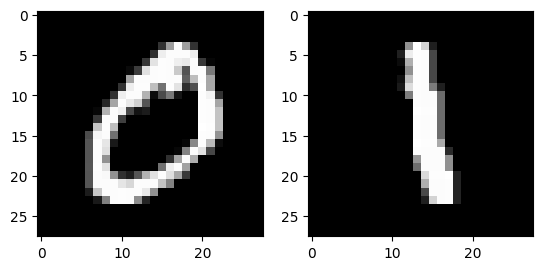

In [14]:
def one_hot_encode(Y: np.ndarray, num_classes: int):
    """
    Encode output (a number in [0,9]) into a vector of size 10 (e.g. 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

    Args:
        Y: np.ndarray (e.g. with shape (60000,))

    Returns:
        Y_encoded: np.ndarray (e.g. with shape (60000, 10))
    """
    # Initialize a matrix of zeros with shape (len(Y), num_classes - e.g. (1000, 2))
    Y_encoded = np.zeros((Y.shape[0], num_classes))
    # For each row, set the corresponding column (feature) to 1 (e.g. [0, 1] for 1 and [1, 0] for 0)
    for i in range(Y.shape[0]):
        Y_encoded[i, Y[i]] = 1
    # Return the encoded matrix
    return Y_encoded

def preprocess_data(X: np.ndarray, Y: np.ndarray, limit: int):
    """
    Preprocess data for training a convolutional neural network.

    Args:
        X: np.ndarray (e.g. with shape (1000, 28, 28))
        Y: np.ndarray (e.g. with shape (1000,))
        limit: int

    Returns:
        X: np.ndarray (e.g. with shape (1000, 28 * 28, 1))
        Y: np.ndarray (e.g. with shape (1000, 10, 1))
    """
    # Limit only to 0 and 1 images.
    zero_index = np.where(Y == 0)[0][:limit]
    one_index = np.where(Y == 1)[0][:limit]
    all_indices = np.concatenate((zero_index, one_index))
    X, Y = X[all_indices], Y[all_indices]
    # Reshape from (1000, 28, 28) to (1000, 1, 28, 28) since the CNN expects the depth to be the first dimension
    X = X.reshape(len(X), 1, 28, 28)
    # Normalize [0, 255] to [0, 1]
    X = X.astype("float32") / 255
    # Encode output (a number in [0,9]) into a vector of size 10 (e.g. 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
    Y = one_hot_encode(Y, 2)
    # Reshape from (1000, 2) to (1000, 2, 1) - i.e. to be a column vector, since this is what the dense layer expects as input
    Y = Y.reshape(len(Y), 2, 1)
    return X, Y

print("5. Preprocessing the data...")
X_train_processed, Y_train_processed = preprocess_data(X_train, Y_train, 500)
X_test_processed, Y_test_processed = preprocess_data(X_test, Y_test, 500)
print(f"\tX_train_processed: {X_train_processed.shape}, Y_train_processed: {Y_train_processed.shape}")
print(f"\tX_test_processed: {X_test_processed.shape}, Y_test_processed: {Y_test_processed.shape}")

# Display the two random images
print("6. Displaying the first and second images on one plot...")
plt.subplot(1, 2, 1)
plt.imshow(X_train_processed[0, 0], cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(X_train_processed[501, 0], cmap="gray")
plt.show()

#### 8.3 Design a CNN

Let's visually present the **architecture of the neural network** that we are going to build for classifying images (whether they contain a handwritten $0$ or $1$).

<center><img src="img/cnn_example.png" alt="The architecture of the CNN that we are going to build" width="770" height="450" /></center>
<p style="text-align: center; font-size: small;"><i><b>Figure 15.</b> The architecture of the CNN that we are building</i></p>

In [15]:
# neural network
network = [
    Convolutional((1, 28, 28), 3, 5),       # Convolutional layer with 5 kernels of size 3x3
    Sigmoid(),                              # We always use an activation function after a convolutional layer
    Reshape((5, 26, 26), (5 * 26 * 26, 1)), # Reshape the output of the convolutional layer to a 2D array
    Dense(5 * 26 * 26, 2),                  # Dense layer with 2 output neurons (0 or 1)
    Sigmoid()                               # We always use an activation function after a dense layer
]

#### 8.4 Train the network
Finally, let's fit the model with the data.

In [16]:
def predict(network, input):
    output = input
    for layer in network:
        output = layer.forward(output)
    return output

def train(network, loss, loss_prime, x_train, y_train, epochs = 1000, learning_rate = 0.01, verbose = True):
    error_history = []
    for e in range(epochs):
        error = 0
        for x, y in zip(x_train, y_train):
            # forward
            output = predict(network, x)

            # error
            error += loss(y, output)

            # backward
            grad = loss_prime(y, output)
            for layer in reversed(network):
                grad = layer.backward(grad, learning_rate)

        error /= len(x_train)
        error_history.append(error)
        if verbose:
            print(f"{e + 1}/{epochs}, error={error}")
    return error_history

1/30, error=0.16978142237234053
2/30, error=0.15512490220522826
3/30, error=0.06424561578936121
4/30, error=0.040971938826523606
5/30, error=0.030889468187522008
6/30, error=0.025251206924264163
7/30, error=0.022623474827516026
8/30, error=0.02272939027127823
9/30, error=0.01952250660407339
10/30, error=0.016694577654486835
11/30, error=0.014277212474680665
12/30, error=0.01260373804871255
13/30, error=0.011433218161141642
14/30, error=0.010434529405148114
15/30, error=0.009441978605167316
16/30, error=0.00854302596940713
17/30, error=0.007914800689965744
18/30, error=0.007561607929809444
19/30, error=0.007139323104791876
20/30, error=0.006746249651590322
21/30, error=0.006599863175421962
22/30, error=0.0064374282278819046
23/30, error=0.006301182172127619
24/30, error=0.006193096912624796
25/30, error=0.006074397197830517
26/30, error=0.005959381376965277
27/30, error=0.005851709126733602
28/30, error=0.005768379449550135
29/30, error=0.005696056049926934
30/30, error=0.00561815732219

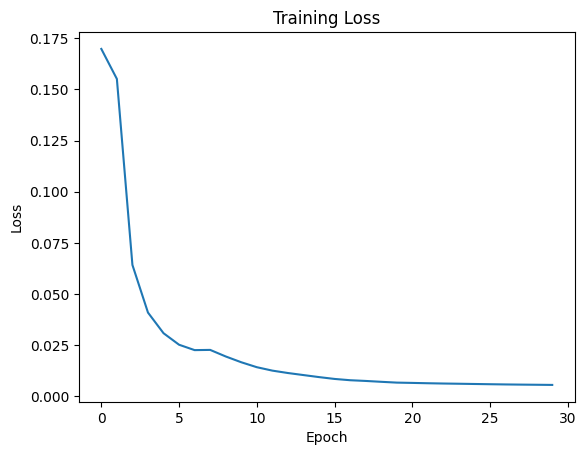

In [17]:
# train
loss_history = train(
    network,
    cross_entropy_loss,
    cross_entropy_loss_derivative,
    X_train_processed,
    Y_train_processed,
    epochs=30,
    learning_rate=0.015
)

# Plot the loss history
plt.plot(loss_history)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

Accuracy: 98.7%


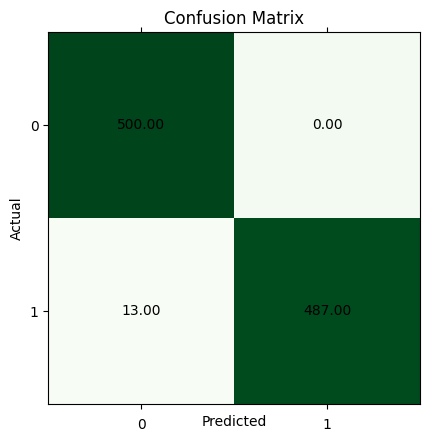

In [18]:
# test
predictions = []
actuals = []
for x, y in zip(X_test_processed, Y_test_processed):
    output = predict(network, x)
    # Convert output vector to a scalar value of 0 or 1
    predictions.append(np.argmax(output))
    actuals.append(np.argmax(y))

# Calculate the confusion matrix
true_positives = sum(1 for p, y in zip(predictions, actuals) if p == 1 and y == 1)
true_negatives = sum(1 for p, y in zip(predictions, actuals) if p == 0 and y == 0)
false_positives = sum(1 for p, y in zip(predictions, actuals) if p == 1 and y == 0)
false_negatives = sum(1 for p, y in zip(predictions, actuals) if p == 0 and y == 1)
confusion_matrix = np.array([[true_positives, false_positives], [false_negatives, true_negatives]])

# Print the accuracy
print(f"Accuracy: {(true_positives + true_negatives)*100 / len(X_test_processed)}%")
plt.matshow(confusion_matrix, cmap="Greens")
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.xticks([0, 1], [0, 1], position=(0, -0.1))
for (x, y), value in np.ndenumerate(confusion_matrix):
    plt.text(x, y, f"{value:.2f}", va="center", ha="center")
plt.show()

 * **NB**: The **random weight generation** at the beginning could harm the training results. Sometimes the starting point leads to a suboptimal **local bottom** and the model can't get out of it with current implementation.